In [2]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt

def SA_TS(dist_mat, T, start_city, mean, sd):

    # Total distance for current path
    def objective_function(dist_mat, state):
        cost = 0
        for i in range(len(state) - 2):
            cost += dist_mat[state[i], state[i+1]]
        cost += dist_mat[state[-1],state[-2]]

        return cost
    
    def switch_two_cities(state):
        a = random.randint(1, len(state)-2)
        b = random.randint(1, len(state)-2)
        while b == a:
            b = random.randint(1, len(state)-2)
        state[a], state[b] = state[b], state[a]
        return state
               
    # Initial path: 0 -> 1, 1 -> 2, ... N-1 -> N
    initial = [i for i in range(len(dist_mat))]
    initial.append(start_city)
    distance_array = []
    
    path = initial 
    current_distance = objective_function(dist_mat, path)
    best_distance = current_distance
    best_path = initial
    
    for t in range(T):
        
        distance_array.append(current_distance)
        new_path = switch_two_cities(path)
        
        new_distance = objective_function(dist_mat, new_path)
        E = current_distance - new_distance
                
        if new_distance < best_distance:
            best_distance = new_distance
            best_path = new_path
        
        # new path is shorter
        if E > 0:
            current_distance = new_distance
            path = new_path
            
        else:
            
            temp = 1 - (t+1)/T
            
            if temp == 0:
                
                plt.plot(distance_array)
                plt.title('Search path (by objective function)')
                plt.ylabel('Path distance')
                plt.xlabel('Temperature (iteration)')
                plt.show()
                
                return best_path, best_distance
            
            p = np.exp(E/temp)
                        
            if np.random.binomial(1, p) == 1:
                current_distance = new_distance
                path = new_path
        
    plt.plot(distance_array)
    plt.title('Search path (by objective function)')
    plt.ylabel('Path distance')
    plt.xlabel('Temperature (iteration)')
    plt.show()
    
    return best_path, best_distance

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,10710.0,3970.0,1830.0,18500.0,10210.0,2790.0,9100.0,8550.0,19320.0,12360.0,13110.0,7230.0,21690.0
1,14740.0,3080.0,130.0,6890.0,11250.0,1310.0,17760.0,7600.0,16270.0,7430.0,6210.0,11280.0,7390.0
2,3250.0,11970.0,5180.0,6830.0,6680.0,12660.0,12280.0,12920.0,3280.0,2800.0,3410.0,11390.0,700.0
3,3290.0,9200.0,17200.0,11980.0,3750.0,10600.0,12990.0,2360.0,11030.0,4550.0,12510.0,8280.0,1100.0
4,11360.0,910.0,19280.0,9830.0,15670.0,3370.0,3640.0,13170.0,3480.0,16220.0,15080.0,10120.0,2990.0
5,9640.0,10030.0,9080.0,10370.0,5850.0,7810.0,1190.0,14020.0,6180.0,6850.0,10170.0,20390.0,2730.0
6,500.0,9680.0,2170.0,10150.0,9160.0,1410.0,3620.0,7520.0,7430.0,3170.0,11950.0,5720.0,220.0
7,4750.0,16830.0,1470.0,1240.0,7470.0,7090.0,10680.0,11140.0,14820.0,6050.0,7370.0,21590.0,2390.0
8,12430.0,17520.0,2460.0,2450.0,2780.0,11540.0,14130.0,9110.0,16010.0,6200.0,19910.0,2750.0,3490.0
9,11810.0,10890.0,4930.0,10640.0,4070.0,17000.0,11830.0,11920.0,16580.0,3750.0,11230.0,11100.0,7650.0


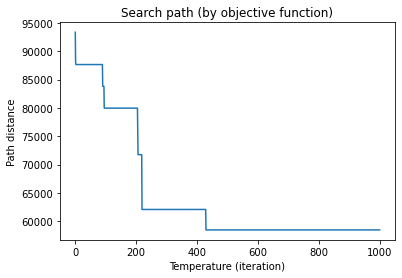

([0, 9, 8, 12, 2, 5, 6, 3, 1, 11, 7, 4, 10, 0], 58460.0)

In [4]:
import numpy as np
import pandas as pd

def write_distance_matrix(n, mean, sigma):
    distance_matrix = np.zeros((n, n))

    for row in range(n):
        for col in range(n):
            distance = 0
            while distance <= 0:
                distance = np.random.normal(mean, sigma)
                distance_matrix[row][col] = round(distance,-1)
    return distance_matrix

T = 1000
mean = 100
sd = 10000
distance_matrix = pd.DataFrame(write_distance_matrix(13, mean, sd))
display(distance_matrix)

SA_TS(distance_matrix.to_numpy(), T, start_city = 0, mean = sd, sd = sd)